In [181]:
import itertools, math
from fractions import Fraction
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Representing a frequency ratio as a fraction: $ \frac {f_0}{f_1} $

In [182]:
f0 = 200
f1 = 300
ratio = Fraction(f0,f1)

Python's Fraction class automatically reduces fractions

In [183]:
print(ratio)

2/3


### Creating octave equivalence classes
$\frac{1}{4} \equiv \frac{1}{2} \equiv \mathbf{\frac{1}{1}} \equiv \frac{2}{1} \equiv \frac{4}{1}$

$\frac{1}{3} \equiv \frac{2}{3} \equiv \mathbf{\frac{4}{3}} \equiv \frac{8}{3} \equiv \frac{16}{3}$

In [184]:
def constrain(f):
    a = f.numerator
    b = f.denominator
    if f > 2:
        while f > 2:
            f *= Fraction(1,2)
    elif f<=1:
        while f<=1:
            f *= 2
    return f

In [185]:
f = Fraction(8,3)
test = constrain(f)
print(test)
f = Fraction(1,3)
test = constrain(f)
print(test)

4/3
4/3


## Representing a frequency ratio as a prime decomposition: $x=2^p3^q5^r$
### arbitrary limit

In [186]:
def pd_to_float(pd):
    p = [2,3,5,7,11,13,17,19,23,29]
    return reduce(lambda x, y: x*y, [p[i]**pd[i] for i in range(len(pd))])

In [187]:
test = pd_to_float((2,-2,0))
print(test)

0.444444444444


In [188]:
def pd_to_frac(pd):
    p = [2,3,5,7,11,13,17,]
    a = 1
    b = 1
    for i, e in enumerate(pd):
        if e >= 0:
            a *= (p[i]**e)
        else:
            b *= p[i]**(e*-1)
    f = Fraction(a,b)
    return f

In [189]:
test = pd_to_frac((2,-2,0))
print(test)

4/9


In [190]:
e = range(-3,4)
pds = [cp for cp in itertools.product(e, repeat=3)]
fractions = [pd_to_frac(pd) for pd in pds]

# James Tenney's *Harmonic Distance Function*
$$ HD(\frac{a}{b})=\log{ab}$$

In [191]:
def hd(ratio):
    if isinstance(ratio, (list,tuple)):
        ratio = pd_to_frac(ratio)
    a = ratio.numerator
    b = ratio.denominator
    return math.log(a*b)

In [192]:
equivalence_classes = [constrain(f) for f in fractions]
equivalence_classes = list(set(equivalence_classes))
equivalence_classes.sort(key=hd)

In [193]:
for ec in equivalence_classes[0:25]: print( 'ratio: {}, harmonic distance: {}'.format(ec, hd(ec) ))

ratio: 2, harmonic distance: 0.69314718056
ratio: 3/2, harmonic distance: 1.79175946923
ratio: 4/3, harmonic distance: 2.48490664979
ratio: 5/3, harmonic distance: 2.7080502011
ratio: 5/4, harmonic distance: 2.99573227355
ratio: 6/5, harmonic distance: 3.40119738166
ratio: 8/5, harmonic distance: 3.68887945411
ratio: 9/5, harmonic distance: 3.80666248977
ratio: 9/8, harmonic distance: 4.27666611902
ratio: 10/9, harmonic distance: 4.49980967033
ratio: 15/8, harmonic distance: 4.78749174278
ratio: 16/9, harmonic distance: 4.96981329958
ratio: 16/15, harmonic distance: 5.48063892334
ratio: 25/16, harmonic distance: 5.99146454711
ratio: 27/16, harmonic distance: 6.06842558824
ratio: 25/18, harmonic distance: 6.10924758276
ratio: 27/20, harmonic distance: 6.29156913956
ratio: 25/24, harmonic distance: 6.39692965522
ratio: 27/25, harmonic distance: 6.51471269087
ratio: 32/25, harmonic distance: 6.68461172767
ratio: 32/27, harmonic distance: 6.7615727688
ratio: 36/25, harmonic distance: 6.802

# Plot in 3D

## Labeled with Octave-Reduced Fractions

In [194]:
p = [pd[0] for pd in pds]
q = [pd[1] for pd in pds]
r = [pd[2] for pd in pds]

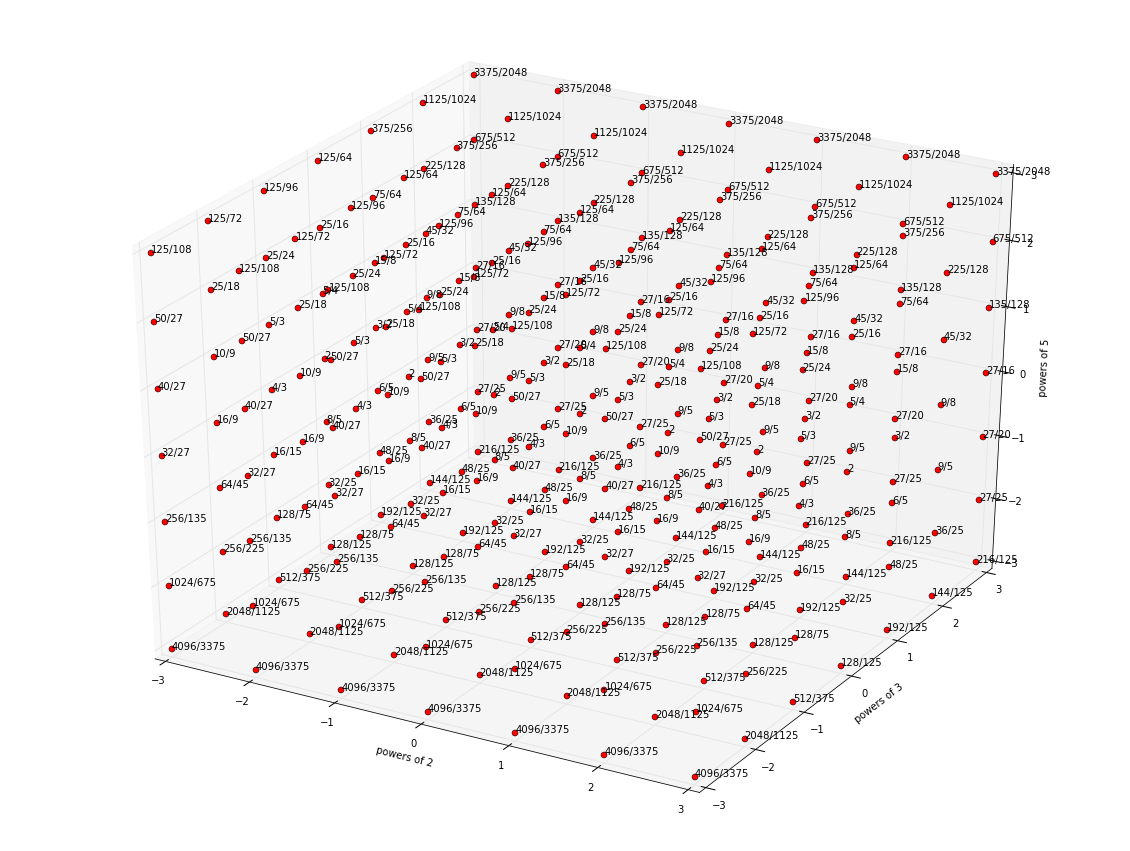

In [195]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot(p, q, r, 'ro')
for pd in pds:
    fraction = constrain(pd_to_frac(pd))
    p = pd[0]
    q = pd[1]
    r = pd[2]
    ax.text(p,q,r,str(fraction))
ax.set_xlabel('powers of 2')
ax.set_ylabel('powers of 3')
ax.set_zlabel('powers of 5')

# 7 Limit JI

In [198]:
e = range(-3,2)
limit = 7
pds = [cp for cp in itertools.product(e, repeat=limit)]
fractions = [pd_to_frac(pd) for pd in pds]
equivalence_classes = [constrain(f) for f in fractions]
equivalence_classes = list(set(equivalence_classes))
equivalence_classes.sort(key=hd)
for ec in equivalence_classes[0:25]: print( 'ratio: {}, harmonic distance: {}'.format(ec, hd(ec) ))

ratio: 2, harmonic distance: 0.69314718056
ratio: 3/2, harmonic distance: 1.79175946923
ratio: 4/3, harmonic distance: 2.48490664979
ratio: 5/3, harmonic distance: 2.7080502011
ratio: 5/4, harmonic distance: 2.99573227355
ratio: 7/4, harmonic distance: 3.33220451018
ratio: 6/5, harmonic distance: 3.40119738166
ratio: 7/5, harmonic distance: 3.55534806149
ratio: 8/5, harmonic distance: 3.68887945411
ratio: 7/6, harmonic distance: 3.73766961828
ratio: 8/7, harmonic distance: 4.02535169074
ratio: 11/6, harmonic distance: 4.18965474203
ratio: 10/7, harmonic distance: 4.24849524205
ratio: 11/7, harmonic distance: 4.34380542185
ratio: 12/7, harmonic distance: 4.43081679884
ratio: 11/8, harmonic distance: 4.47733681448
ratio: 10/9, harmonic distance: 4.49980967033
ratio: 13/7, harmonic distance: 4.51085950652
ratio: 11/9, harmonic distance: 4.59511985013
ratio: 13/8, harmonic distance: 4.64439089914
ratio: 11/10, harmonic distance: 4.70048036579
ratio: 13/9, harmonic distance: 4.7621739348
ra